In [149]:
#Esta versão, com contribuição de um Jason Brownlee, site https://www.linkedin.com/company/machine-learning-mastery/
# https://books.google.com.br/books?hl=pt-BR&lr=&id=BgmqDwAAQBAJ&oi=fnd&pg=PP1&dq=Machine+Learning+Mastery+with+Python&ots=fsi-UxlO4U&sig=I4BkZlIsWF1A17R4vMkj_-rTV78&redi_esc=y#v=onepage&q=Machine%20Learning%20Mastery%20with%20Python&f=false
# do Livro Machine learning: Jason Brownlee, Machine Learning Mastery, 8 de abr. de 2016 - 178 páginas
# com dados mais completos de embrapa
# Fonte da planilha: https://www.conab.gov.br/info-agro/safras/serie-historica-das-safras/itemlist/category/891-cana-de-acucar-agricola
# Fonte dos dados históricos: https://www.embrapa.br/agencia-de-informacao-tecnologica/cultivos/cana/pre-producao/socioeconomia/estatisticas/series-historicas


# agora tenho bom resultado

# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [150]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)


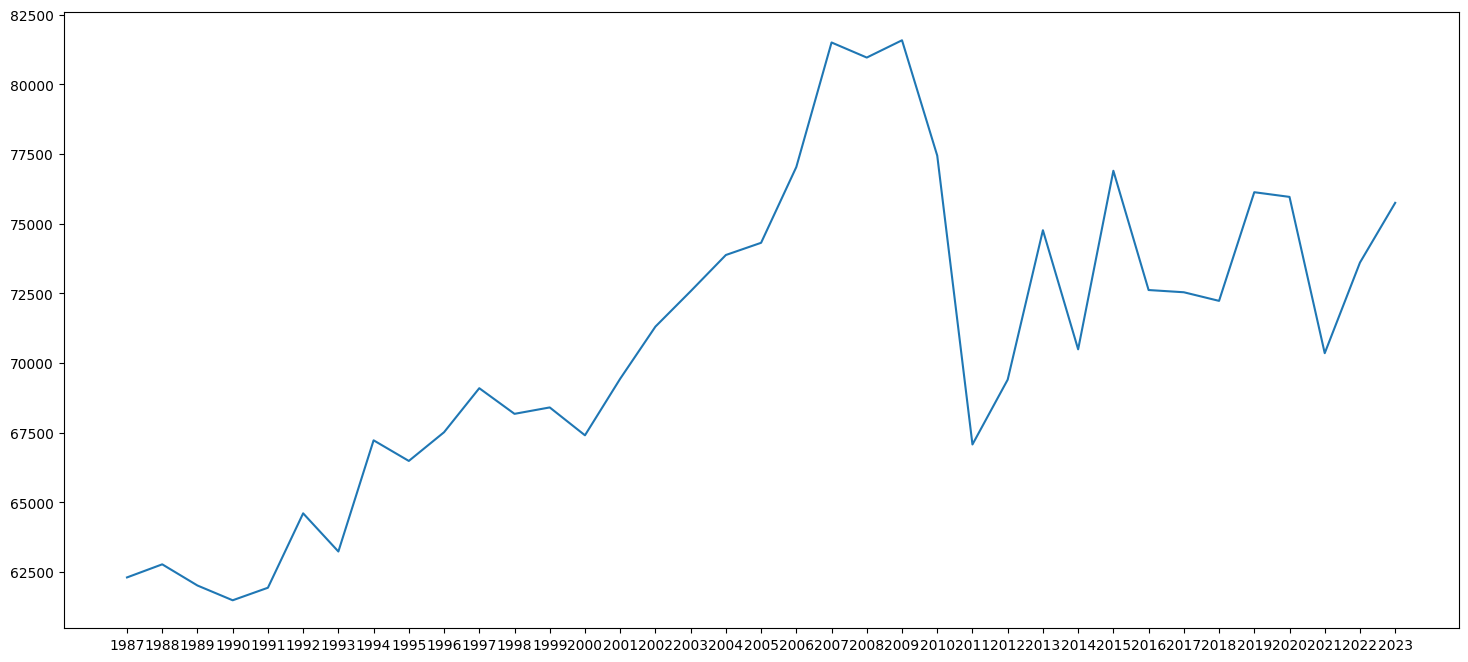

In [151]:
# load the dataset
pd.options.mode.chained_assignment = None
file = '/Users/User/Documents/Marcos/CanaSerieHistZ.xls'
prodcana = pd.read_excel(file, sheet_name = 2)

dataframe = pd.DataFrame(prodcana)
dataframe.drop([0,1,2,3,40,41,42], inplace = True)
dataframe.columns = dataframe.iloc[0]
dataframe.index = dataframe['REGIÃO/UF']
dataframe.drop(['REGIÃO/UF'], axis = 1, inplace = True)
dataframe.drop(['REGIÃO/UF'], inplace = True)

# Fonte da planilha: https://www.conab.gov.br/info-agro/safras/serie-historica-das-safras/itemlist/category/891-cana-de-acucar-agricola
# Fonte dos dados históricos: https://www.embrapa.br/agencia-de-informacao-tecnologica/cultivos/cana/pre-producao/socioeconomia/estatisticas/series-historicas
#  de 1987 a 2008 (usado até 2004), em t/ha
# Na planilha temos dados 2023/24, consideramos o primero ano, como 2023
dados_numpy = np.array([62310,62780,62020,61490, 61940, 64610, 63240, 67230, 66490, 67520, 69100, 68180, 68410, 67410, 69440, 71310, 72580, 73880])
ano_numpy = np.array(  [ 1987, 1988, 1989, 1990,  1991,  1992,  1993,  1994,  1995,  1996,  1997,   1998, 1999,  2000,  2001,  2002,  2003,  2004])

TSAnterior = pd.Series(dados_numpy,index=ano_numpy )

TSAtual = dataframe.loc['BRASIL']
TSAtual.index = TSAtual.index.str[0:4]
TSAtual = TSAtual.astype('int32')
TSTotal = pd.concat([TSAnterior, TSAtual])

linha_array = TSTotal.to_numpy().reshape(-1, 1)


dfSafra = pd.DataFrame(list(TSTotal.items()), columns=['Ano', 'Valor'])
dfSafra['Ano'] = dfSafra['Ano'].apply(lambda x: str(x).strip('(),'))
dfSafra = dfSafra.set_index('Ano')
#Plotando gráfico inteiro
plt.figure(figsize =(18, 8))
plt.plot(dfSafra)

dataframe = linha_array.astype('float32')
dataset = dataframe.astype('float32')



In [152]:
# normaliza dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# divide entre dados de Treino e Teste
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

24 13


In [153]:
# Converte o vetor de valores em datasetr de matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
     a = dataset[i:(i+look_back), 0]
     dataX.append(a)
     dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [154]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [155]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch 1/100
22/22 - 1s - loss: 0.2373 - 1s/epoch - 66ms/step
Epoch 2/100
22/22 - 0s - loss: 0.2127 - 43ms/epoch - 2ms/step
Epoch 3/100
22/22 - 0s - loss: 0.1886 - 43ms/epoch - 2ms/step
Epoch 4/100
22/22 - 0s - loss: 0.1691 - 42ms/epoch - 2ms/step
Epoch 5/100
22/22 - 0s - loss: 0.1523 - 39ms/epoch - 2ms/step
Epoch 6/100
22/22 - 0s - loss: 0.1363 - 43ms/epoch - 2ms/step
Epoch 7/100
22/22 - 0s - loss: 0.1224 - 40ms/epoch - 2ms/step
Epoch 8/100
22/22 - 0s - loss: 0.1114 - 41ms/epoch - 2ms/step
Epoch 9/100
22/22 - 0s - loss: 0.1016 - 40ms/epoch - 2ms/step
Epoch 10/100
22/22 - 0s - loss: 0.0932 - 42ms/epoch - 2ms/step
Epoch 11/100
22/22 - 0s - loss: 0.0864 - 41ms/epoch - 2ms/step
Epoch 12/100
22/22 - 0s - loss: 0.0805 - 40ms/epoch - 2ms/step
Epoch 13/100
22/22 - 0s - loss: 0.0760 - 58ms/epoch - 3ms/step
Epoch 14/100
22/22 - 0s - loss: 0.0717 - 36ms/epoch - 2ms/step
Epoch 15/100
22/22 - 0s - loss: 0.0685 - 35ms/epoch - 2ms/step
Epoch 16/100
22/22 - 0s - loss: 0.0658 - 37ms/epoch - 2ms/step
Ep

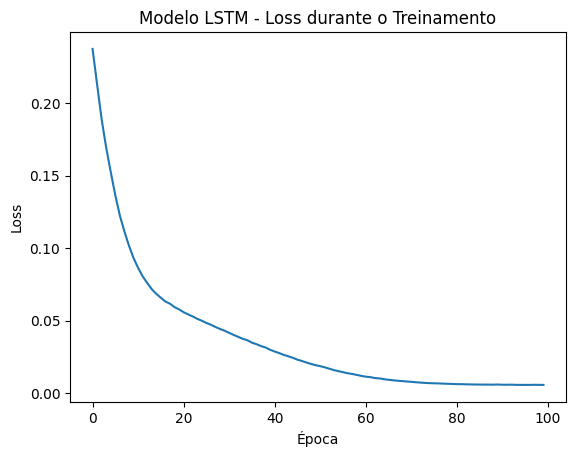

In [157]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Plotar o resultado do loss
plt.plot(history.history['loss'])
plt.title('Modelo LSTM - Loss durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()


In [158]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

1/1 [==============================] - 0s 20ms/step
Train Score: 1512.73 RMSE
Test Score: 4029.84 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(dfSafra)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

#Formatando gráfico...
plt.xticks(rotation=90)
plt.title('Predição da Produtividade da Cana de Açucar no Brasil usando LSTM')
plt.xlabel('Safra', fontsize = 14)
plt.ylabel("Tonelada/Hectare", fontsize = 14)
plt.legend(['Real', 'Treinamento', 'Predições'], loc=2, prop={'size': 11})
plt.figure(figsize =(18, 8))
plt.show()